# Examen Data Science & AI

|                          | |
| :---                     | :--- |
| **Examenreeks**          | Examen 2de zittijd |
| **Student voornaam:**    | Laurent |
| **Student familienaam:** | Duquesnoy |
| **Studentennummer:**     | 292730ld |
| **Datum & uur:**         | Maandag 21 augustus 2023, 15:30 |
| **Klasgroep:**           | TIATP |
| **IOEM-student:**        | NEE |

Voeg waar nodig codecellen toe voor het uitwerken van de vragen (tussen de vraag- en antwoordcellen). LET OP! De inhoud van de codecellen wordt niet als antwoord beschouwd! Enkel wat je in de daarvoor voorziene Markdown-cellen noteert telt als antwoord! De inhoud van de codecellen dient enkel ter ondersteuning, zodat we kunnen zien hoe je tot je antwoord gekomen bent als het niet zou overeenkomen met de verwachte uitkomst.

Het examen staat in totaal op 50 punten. Dit cijfer wordt herleid naar een examencijfer op 20.

In [5]:
# Importeren van de nodige packages
# Vul zelf aan met extra packages als dit nodig is voor de oefeningen!
# Package imports for data science and time series analysis in particular

from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd;
import scipy.stats as stats;
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from statsmodels.graphics.mosaicplot import mosaic
from statsmodels.tsa.api import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose

## Vraag 1 [2 pt]

Wat is het meetniveau van elk van deze variabelen:

1. de tijd waarin een langeafstandloper 20km loopt in een wedstrijd
2. het rugnummer dat de langeafstandsloper krijgt opgespeld tijdens de wedstrijd
3. de plaats in de uiteindelijke rangschikking waarop de langeafstandsloper eindigt
4. de medaille die de langeafstandsloper eventueel behaalde: goud, zilver of brons

### Antwoord vraag 1

1. Ratio 
2. Ordinaal
3. Ordinaal
4. Ordinaal

## Vraag 2 [3 pt]


Een artikel "Hoge niveaus van kwik zijn gevonden bij inwoners van Californië"
beschrijft een onderzoek waarin haarstalen werden getest op
kwik. De haarstalen werden verkregen van meer dan 6000 mensen die vrijwillig haarstalen opstuurden naar
onderzoekers van Greenpeace en de Sierra Club. De onderzoekers
ontdekten dat bijna een derde van de geteste mensen
kwikgehaltes had die hoger waren dan de concentratie
veilig te zijn.

1. Is dit een random sample? Leg uit.
2. Welk type fout(en) wordt hier gemaakt?
3. Is dit een goede sample? Leg uit.

### Antwoord Vraag 2

1. ...
2. ...
3. ...

## Vraag 3 [4 pt]

Normaal gezien komen baby's na een zwangerschap van 37 tot 43 weken ter wereld. Het geboortewicht van deze baby's is in de VS normaal verdeeld met gemiddelde = 3432g en standaardafwijking = 482g.
1. Wat is de kans dat het geboortegewicht groter is dan 3500g?
2. Wat is de kans dat het geboortegewicht tussen 3000g en 4000g ligt?
3. Wat zijn de 0.1% meest extreme geboortegewichten?


In [6]:
stdDev = 482
mean = 3432

print("1. P(3500 < Z) : %f" % (1 - stats.norm.cdf(3500, loc=mean, scale=stdDev)))
print("2. P(3000 < Z < 4000) : %f" % (stats.norm.cdf(4000, loc=mean, scale=stdDev) - stats.norm.cdf(3000, loc=mean, scale=stdDev)))
print("3. .1 percent lowest : %f" % (stats.norm.ppf(.001, loc=mean, scale=stdDev)))
print("3 .1 percent highest : %f" % (stats.norm.ppf(.999, loc=mean, scale=stdDev)))

1. P(3500 < Z) : 0.443904
2. P(3000 < Z < 4000) : 0.695631
3. .1 percent lowest : 1942.508028
3 .1 percent highest : 4921.491972


### Antwoord vraag 3

1. 0.443904
2. 0.695631
3. 1942.508028 laagst en 4921.491972 hoogst


## Vraag 4 [5 pt]

_X_ is het aantal gebroken eieren in een willekeurig karton van 12 eieren. De probabiliteitsdistributie van _X_ is als volgt

| | | | | | |
| :--- | :--- | :--- | :--- | :--- | :--- |
| _X_ | 0 | 1 | 2 | 3 | 4 |
| _P(X)_ | 0.65 | 0.20 | 0.10 | 0.04 | ? |

1. Enkel 0, 1, 2, 3 en 4 hebben een probabiliteit > 0. Wat is de waarde voor _P(4)_?
2. Wat is de kans dat een karton van 12 eieren maximum 2 gebroken eieren heeft?
3. Wat is de kans dat een karton van 12 eieren minstens 9 niet gebroken eieren heeft?
4. Wat is de kans dat een karton van 12 eieren exact 9 niet gebroken eieren heeft?
5. Een palet van 800 kartons van 12 eieren zal ongeveer hoeveel gebroken eieren tellen?



In [90]:
probabilities = {
    0 : 0.65,
    2: 0.20,
    3: 0.04
}

# calculate fourth probability
probabilities[4] = 1 - sum(probabilities.values())
print(probabilities[4])

print(probabilities.values())

# chance that value is at most 2
print(probabilities[0] + probabilities[2])

# chance that value is at most 3
print(probabilities[0] + probabilities[2] + probabilities[3])

# chance that value is at exactly 3
print(probabilities[3])

0.10999999999999988
dict_values([0.65, 0.2, 0.04, 0.10999999999999988])
0.8500000000000001
0.8900000000000001
0.04


### Antwoord vraag 4

1. 0.10
2. 85.00
3. 89
4. .04
5. 

## Vraag 5 [5 pt, geen giscorrectie]

Kies bij 1 tot en met 4 telkens het enige correcte antwoord.

1. De centrale limietstelling is belangrijk voor de statistiek omdat

    - A. de distributie van het steekproefgemiddelde bij benadering een normale verdeling heeft voor om het even welke steekproefgrootte.
    - B. de distributie van het steekproefgemiddelde bij benadering een normale verdeling heeft ongeacht de onderliggende populatie.
    - C. de distributie van het steekproefgemiddelde bij benadering een normale verdeling heeft ongeacht de onderliggende populatie, voor voldoende grote steekproeven.
    - D. de distributie van het steekproefgemiddelde bij benadering een normale verdeling heeft indien de onderliggende populatie ook een normale verdeling heeft en dit voor voldoende grote steekproeven.

2. Na het uitvoeren van een enquête wil een onderzoeker de standaardfout terugbrengen tot $\frac{1}{3}$ van de oorspronkelijke waarde. Hoe zal de steekproefgrootte veranderen?

    - A. De steekproefgrootte wordt verkleind met een factor 9.
    - B. De steekproefgrootte wordt vergroot met een factor 3.
    - C. De steekproefgrootte wordt vergroot met een factor 9.
    - D. De steekproefgrootte wordt verkleind met een factor 3.
    - E. Er is niet genoeg informatie gegeven.

3. Uit een willekeurige steekproef van 250 studenten aan een hogeschool blijkt dat deze studenten gemiddeld 28.6 studiepunten per semester opnemen met een standaardafwijking van 3.4 studiepunten. Het 95% betrouwbaarheidsinterval voor het gemiddelde is 28.6 ± 0.421.  

    Geef de interpretatie van het betrouwbaarheidsinterval.

    - A. 95% van de studenten neemt tussen 28.179 en 29.021 studiepunten per semester op.
    - B. We hebben 95% zekerheid dat het gemiddelde aantal studiepunten per semester van studenten aan de hogeschool in het interval 28.179 en 29.021 valt.
    - C. We hebben 95% zekerheid dat het gemiddelde aantal studiepunten per semester van de studenten in de steekproef in het interval 28.179 en 29.021 valt.
    - D. De kans dat een student 28.179 en 29.021 studiepunten per semester opneemt is 0.95.

4. In een bepaald jaar werd de verdeling van de salarissen voor professionele sporters gekenmerkt door een gemiddelde van 1.6 miljoen dollar en een standaardafwijking van 0.7 miljoen dollar. Stel dat er een sample van 100 spelers uit de hoogste klasse is genomen. Wat is bij benadering de kans dat het gemiddelde salaris van de 100 spelers dat jaar hoger was dan 1.1 miljoen dollar?

    - A. 0.7625
    - B. ongeveer 1
    - C. 0.2375
    - D. ongeveer 0

5. Geef de berekening die je gemaakt hebt om het juiste antwoord te vinden voor vraag 4.

### Antwoord vraag 5

1. C 
2. 
3. C
4. ...
5. ...

## Vraag 6 [5 pt]

Een autofabrikant die wil adverteren dat een van zijn modellen 50 kilometer per liter haalt, besluit een brandstofefficiëntietest uit te voeren. Zes niet-professionele chauffeurs worden geselecteerd en elk van hen rijdt in een auto van Phoenix naar Los Angeles. De resulterende brandstofefficiënties
(in kilometer per liter) zijn hieronder gegeven.
Zijn de gevonden gegevens in tegenspraak met de bewering
dat de werkelijke gemiddelde brandstofefficiëntie (ten minste) 50 kilometer per liter is? Maak gebruik van een 5% significantieniveau.

1. Welke hypothesetoets ga je toepassen om deze onderzoeksvraag te beantwoorden? Wees zo specifiek mogelijk!
2. Formuleer de nulhypothese en de alternatieve hypothese
3. Bereken de gepaste toetsingsgrootheid (teststatistiek) voor deze toets. Geef het symbool en de waarde
4. Bereken de p-waarde
5. Trek een besluit op basis van de vorige stap en formuleer een antwoord op de onderzoeksvraag.


In [13]:
brandstof = [45.52, 47.88, 51.92, 47.44, 50.48, 49.36]

n = len(brandstof) # sample size
sm = np.mean(brandstof) # sample mean
s = np.std(brandstof) # sample standard deviation
a = 0.05 # significance level
m0 = 50 # hypothetical pop. mean

p = stats.norm.sf(sm, loc=m0, scale=s/np.sqrt(n)) # p-value
print('p-value =', p)
if(p < a):
    print('Null hypothesis rejected.')
else:
    print('Null hypothesis accepted.')

# identify alternative hypothesis
if(sm > m0):
    print('Alternative hypothesis: μ >', m0)
else:
    print('Alternative hypothesis: μ <', m0)




p-value = 0.9254138630264838
Null hypothesis accepted.
Alternative hypothesis: μ < 50


### Antwoord vraag 6

1. student-t test (sample size < 30) 
2. $H_0: \mu = 50.0$ , $H_1: \mu > 50.0$
3.  $\overline{x} = 50.0$
4. p waarde: 0.9254138630264838
5. if we assume $H_0$ is true and accepted, which it is, the probability to draw a sample with this particular value for $\overline{x} is pretty realistic. We can accept the null hypothesis here with a confidence level of 5 percent.

## Vraag 7 [5 pt]


Kunnen schaaklessen en dagelijks schaken het geheugen verbeteren? In 2001 verscheen een artikel waarin het volgende onderzoek beschreven werd. 12 leerlingen uit het zesde leerjaar die nog nooit eerder hadden geschaakt, namen deel aan een programma waarin ze schaaklessen volgden en dagelijks schaakten gedurende 9 maanden. Elke leerling deed een geheugentest
voordat ze aan het schaakprogramma begonnen en opnieuw aan het einde van de periode van 9 maanden. De gevonden gegevens zijn te vinden in de bijgevoegde
tabel. Behalen leerlingen die deelnamen aan het schaakprogramma hogere geheugenscores?

1. Maak een plot
2. Welke hypothesetoets ga je toepassen om deze onderzoeksvraag te beantwoorden? Wees zo specifiek mogelijk!
3. Formuleer de nulhypothese en de alternatieve hypothese
4. Bereken de p-waarde
5. Trek een besluit op basis van de vorige stap en formuleer een antwoord op de onderzoeksvraag.

p value:  TtestResult(statistic=-4.563958109000196, pvalue=0.0008113648807196272, df=11)
chi2:  100.21150108587935


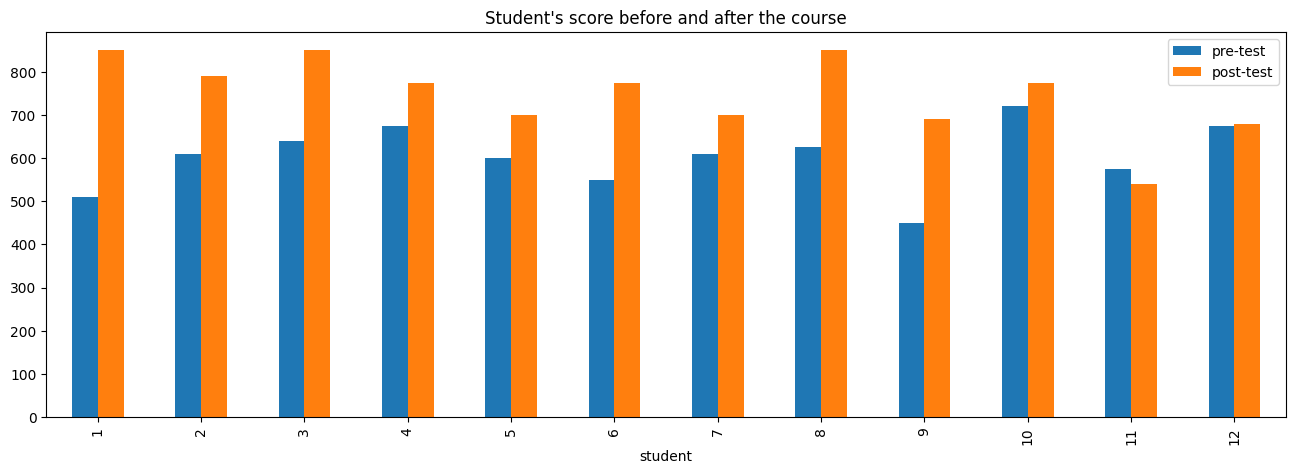

In [64]:
dfschaken = pd.DataFrame(data={
  'student': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
  'pre-test': [510, 610, 640, 675, 600, 550, 610, 625, 450, 720, 575, 675],
  'post-test': [850, 790, 850, 775, 700, 775, 700, 850, 690, 775, 540, 680]
})

dfschaken.plot(x='student', y=['pre-test', 'post-test'], kind='bar', figsize=(16, 5), title='Student\'s score before and after the course')

p = stats.ttest_rel(dfschaken['pre-test'], dfschaken['post-test'])
print('p value: ', p)

# calculate chi square of the data
chi2, p, dof, expected = stats.chi2_contingency([dfschaken['pre-test'], dfschaken['post-test']])
print('chi2: ', chi2)


### Antwoord vraag 7

1. (Genereer de plot hierboven in een codecel. Geef duidelijk aan dat de plot bij deze deelvraag hoort!)
2. chi-square test
3. mean of student's score after the course should be larger than the mean of the score before
4. 0.0008113648807196272
5. after seeing a chi-square


## Vraag 8 [7 pt]

Is de prestatie van een atleet in een skiwedstrijd van 20 km gerelateerd aan zijn cardiovasculaire fitheid? De cardiovasculaire fitheid wordt gemeten aan de hand van de tijd tot uitputting bij het lopen op een loopband. De onderstaande gegevens dateren uit 1995 waarbij

- x = tijd tot uitputting op de loopband (in minuten)
- y = 20-km skitijd (in minuten)


1. Maak de onderstaande grafiek

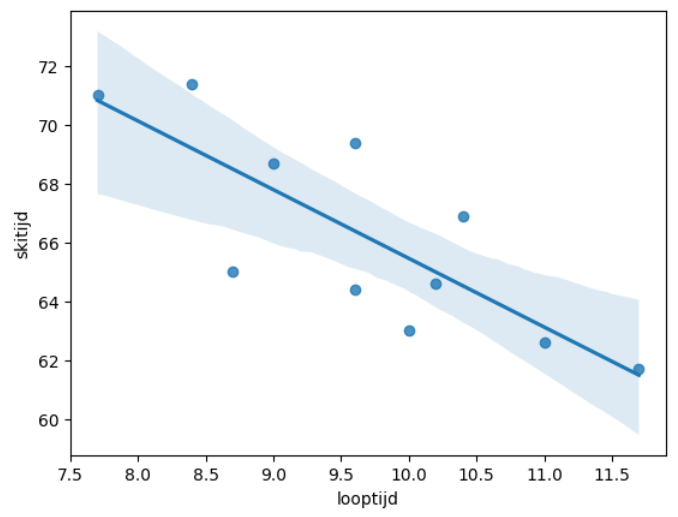

2. Geef de vergelijking van de regressierechte
3. Bereken de correlatiecoëfficient (symbool + waarde)
4. Geef de interpretatie voor de waarde van de correlatiecoëfficiënt
5. Bereken de volgende waarden. Niet gewoon tellen!
    - 5.A. Wat is de interkwartielafstand van de looptijden?
    - 5.B.  Welk percentage van de atleten skiden de 20 km in minder dan 70 minuten?

y = -0.7961921411093373 * x + -0.7961921411093373
0.25     8.85
0.50     9.60
0.75    10.30
Name: looptijd, dtype: float64
r = -0.7961921411093373
0.8181818181818182


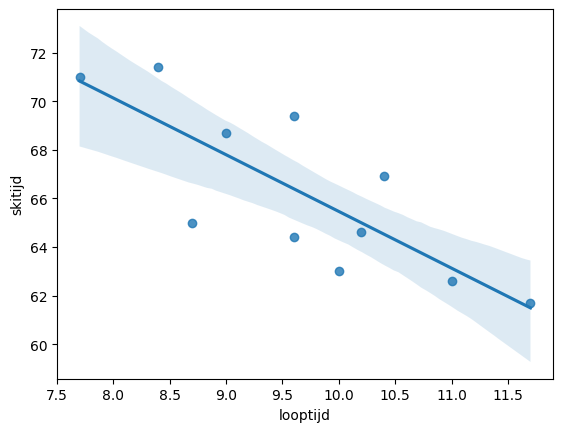

In [73]:
dffit = pd.DataFrame(data={'looptijd': [7.7, 8.4, 8.7, 9.0, 9.6, 9.6, 10.0, 10.2, 10.4, 11.0, 11.7],
                          'skitijd': [71.0, 71.4, 65.0, 68.7, 64.4, 69.4, 63.0, 64.6, 66.9, 62.6, 61.7]})

correlation = dffit.corr(method='pearson')

# plot for first question
sns.regplot(x=dffit['looptijd'], y=dffit['skitijd'], data=dffit)

print('y = ' + str(correlation['skitijd']['looptijd']) + ' * x + ' + str(correlation['skitijd']['looptijd']))

# icr
print(dffit['looptijd'].quantile([0.25, 0.5, 0.75]))

# print correlation coefficient
print('r = ' + str(correlation['skitijd']['looptijd']))

# print percentage lower than 70
print(len(dffit[dffit['skitijd'] < 70]) / len(dffit))


### Antwoord vraag 8

1. (Genereer de plot hierboven in een codecel. Geef duidelijk aan dat de plot bij deze deelvraag hoort!)
2. y = -0.7961921411093373 * x + -0.7961921411093373
3. r = -0.79619
4. ...
5.
    - A. 1.45
    - B. 81.818181

## Vraag 9 [9 pt]
Hieronder staan de gegevens van de totale hoeveelheid gevangen tarbot in de havens van Oostende, Zeebrugge en Nieuwpoort (x 1000 kg). De gegevens zijn afkomstig van StatBel.

1. Vorm de kolom 'datum' om naar het type datetime.
2. Stel de kolom 'datum' in als index.
3. Maak de volgende plot.

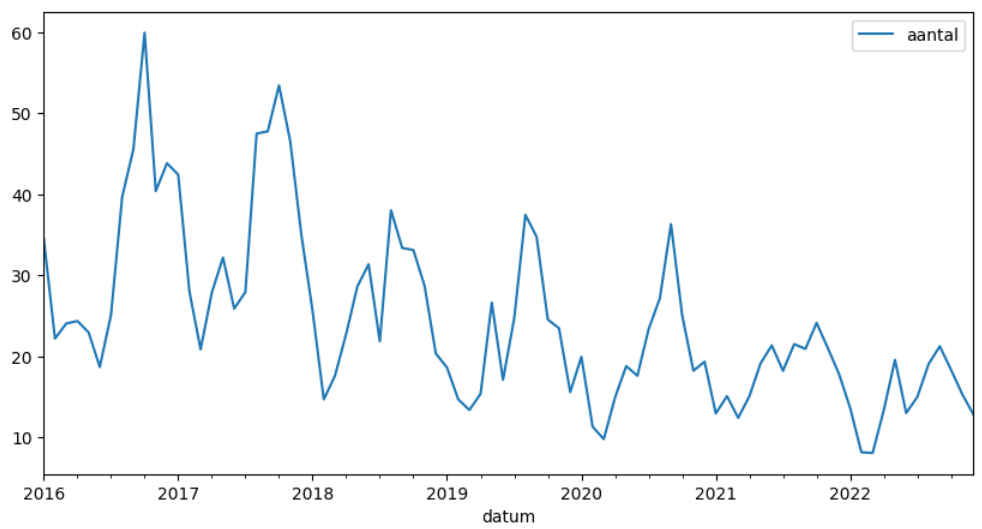


4. Kies een methode om een model te maken voor de data. Leg uit waarom je voor deze methode kiest.
5. Train het model met alle beschikbare data.
6. Maak voorspellingen voor het jaar 2023.
7. Bereken op basis van de voorspellingen de totale verkochte hoeveelheid tarbot voor 2023.
8. Er is duidelijk een dalende trend sinds 2016. Bedenk een manier om te bepalen met hoeveel procent de vangst van tarbot afneemt sinds 2016 en werk deze uit.


/home/laurent/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


114.9191252772503
-94.42011777092155


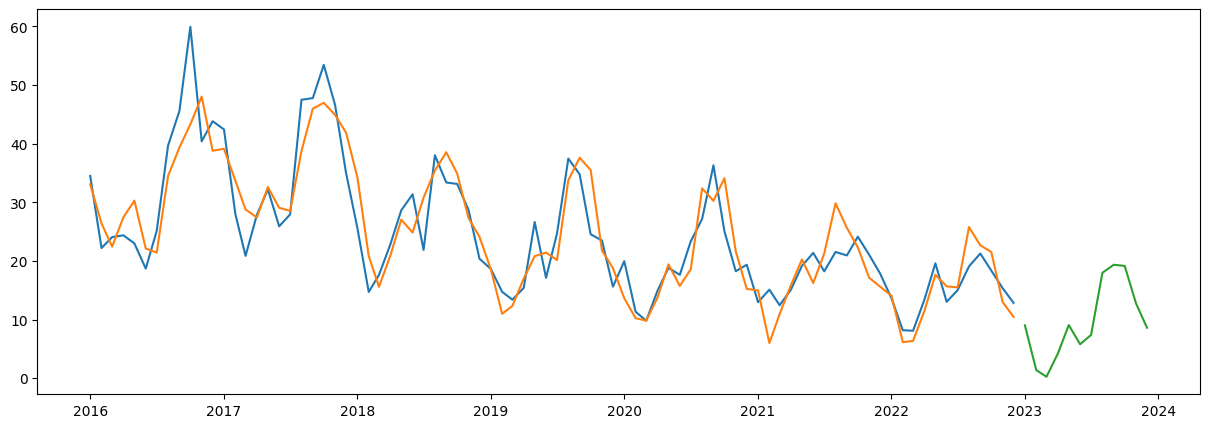

In [75]:
# De totale hoeveelheid gevangen tarbot in 3 Oostende, Zeebrugge en Nieuwpoort (x 1000 kg)

dftarbot = pd.DataFrame(data={
    'maand': [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83],
    'datum': ['2016/01/01', '2016/02/01', '2016/03/01', '2016/04/01', '2016/05/01', '2016/06/01', '2016/07/01', '2016/08/01', '2016/09/01', '2016/10/01', '2016/11/01', '2016/12/01', '2017/01/01', '2017/02/01', '2017/03/01', '2017/04/01', '2017/05/01', '2017/06/01', '2017/07/01', '2017/08/01', '2017/09/01', '2017/10/01', '2017/11/01', '2017/12/01', '2018/01/01', '2018/02/01', '2018/03/01', '2018/04/01', '2018/05/01', '2018/06/01', '2018/07/01', '2018/08/01', '2018/09/01', '2018/10/01', '2018/11/01', '2018/12/01', '2019/01/01', '2019/02/01', '2019/03/01', '2019/04/01', '2019/05/01', '2019/06/01', '2019/07/01', '2019/08/01', '2019/09/01', '2019/10/01', '2019/11/01', '2019/12/01', '2020/01/01', '2020/02/01', '2020/03/01', '2020/04/01', '2020/05/01', '2020/06/01', '2020/07/01', '2020/08/01', '2020/09/01', '2020/10/01', '2020/11/01', '2020/12/01', '2021/01/01', '2021/02/01', '2021/03/01', '2021/04/01', '2021/05/01', '2021/06/01', '2021/07/01', '2021/08/01', '2021/09/01', '2021/10/01', '2021/11/01', '2021/12/01', '2022/01/01', '2022/02/01', '2022/03/01', '2022/04/01', '2022/05/01', '2022/06/01', '2022/07/01', '2022/08/01', '2022/09/01', '2022/10/01', '2022/11/01', '2022/12/01'],
    'aantal': [34.511,22.202,24.067,24.375,22.985,18.697,25.137,39.685,45.569,59.948,40.412,43.840,42.437,28.044,20.867,27.869,32.209,25.902,27.956,47.498,47.781,53.451,46.590,34.985,25.601,14.707,17.621,22.802,28.647,31.375,21.879,38.034,33.390,33.135,28.703,20.375,18.638,14.725,13.397,15.403,26.646,17.125,24.680,37.464,34.778,24.558,23.487,15.612,19.964,11.345,9.803,14.927,18.813,17.631,23.365,27.161,36.320,25.063,18.246,19.357,12.968,15.105,12.434,15.107,19.165,21.373,18.230,21.531,20.940,24.142,21.046,17.841,13.630,8.185,8.093,13.383,19.593,13.028,15.031,19.073,21.266,18.365,15.360,12.843]
})
dftarbot = dftarbot.astype({'datum': 'datetime64'})
dftarbot.set_index('datum', inplace=True)

# plot data in grafiek
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(dftarbot['aantal'], label='tarbot')

seasonal_periods = 12
tarbot_hw = ExponentialSmoothing(dftarbot['aantal'], 
    seasonal_periods=seasonal_periods, 
    trend='add', seasonal='add').fit()
ax.plot(tarbot_hw.fittedvalues, label='tarbot fitted')

tarbot_predicted = tarbot_hw.forecast(12)
ax.plot(tarbot_predicted, label='tarbot predicted')


print(tarbot_predicted.sum())


# calculate the percent of descent since 2016 by comparing the sum of the predicted values with the sum of the actual values
print((tarbot_predicted.sum() - dftarbot['aantal'].sum()) / dftarbot['aantal'].sum() * 100)

### Antwoord vraag 9

1. ...
2. ...
3. (Genereer de plot hierboven in een codecel. Geef duidelijk aan dat de plot bij deze deelvraag hoort!)
4. triple exponential smoothing, om om te gaan met seasonality
5. ...
6. ...
7. ...
8. ...

## Vraag 10 [5 pt]
De hypothese luidt dat wanneer duiven
gedesoriënteerd zijn op een bepaalde manier, ze geen voorkeur meer zullen vertonen
voor welke vliegrichting dan ook na het opstijgen. Om dit te testen,
worden 120 duiven gedesoriënteerd en losgelaten en de vliegrichting
van de vlucht van elke duif wordt geregistreerd. De resulterende gegevens staan
in de bijgaande tabel.
Voer een test uit met 10% significance level om de vraag te beantwoorden.

1. Welke hypothesetoets ga je toepassen om deze onderzoeksvraag te beantwoorden? Wees zo specifiek mogelijk!
2. Formuleer de nulhypothese en de alternatieve hypothese
3. Bereken de gepaste toetsingsgrootheid (teststatistiek) voor deze toets. Geef het symbool en de waarde
4. Bereken de p-waarde
5. Trek een besluit op basis van de vorige stap en formuleer een antwoord op de onderzoeksvraag.


In [61]:
dfduiven = pd.DataFrame(data={
  'richting': ['0° tot 45°', '45° tot 90°', '90° tot 135°', '135° tot 180°', '180° tot 225°', '225° tot 270°', '270° tot 315°', '315° tot 360°'],
  'aantal': [12, 16, 17, 15, 13, 20, 17, 10]
})
n = len(dfduiven) # sample size
sm = np.mean(dfduiven.aantal.mean()) # sample mean
s = np.std(dfduiven.aantal.std()) # sample standard deviation
a = 0.10 # significance level

p = stats.t.cdf(sm, df=n-1) # p-value

print('p-value =', p)
if(p < a):
    print('Null hypothesis rejected.')
else:
    print('Null hypothesis accepted.')

# identify alternative hypothesis
if(sm > m0):
    print('Alternative hypothesis: μ >', m0)
else:
    print('Alternative hypothesis: μ <', m0)




p-value = 0.9999992974151876
Null hypothesis accepted.
Alternative hypothesis: μ < 50


### Antwoord vraag 10

1. two-tailed z test 
2. 
3. ...
4. ...
5. ...